In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from math import pi
from Network import RingNetwork, SimpleMixedNetwork, MixedNetwork, PlasticMixedNetwork

%matplotlib inline

In [2]:
def plot_output(locations, alphas, f, input_c=None, target_indices=None):
    alphas = np.tile(alphas, (50,1))
    T = locations.size
    
    fig = plt.figure(1)
    gridspec.GridSpec(9,1)
    
    plt.subplot2grid((9,1), (0,0), rowspan=4)
    plt.plot(np.arange(T), locations, linewidth=2)
    if (input_c is not None) and (target_indices is not None):
        for c_idx, activity_c in enumerate(input_c.T): # Iterate over each context unit
            on_time = np.where(activity_c > 0)
            target_index = locations[target_indices[c_idx]]
            plt.axhline(
                target_index, np.min(on_time)/T, np.max(on_time)/T,
                linewidth=4, color="red"
                )
    plt.xticks(np.arange(0, T, 100), np.arange(0, T, 100))
    plt.yticks(
        [0, pi, 2*pi], ["0", "Pi", "2Pi"]
        )
    plt.ylabel("Location", fontsize=14)
    plt.title("Activity over Time", fontsize=16)

    plt.subplot2grid((9,1), (4,0))
    plt.imshow(alphas, aspect='auto')
    plt.yticks([])
    plt.xticks([])
    plt.ylabel("Input\nStrength\n\n", fontsize=14)
    
    plt.subplot2grid((9,1), (5,0), rowspan=4)
    norm = mcolors.DivergingNorm(vmin=f.min(), vmax = f.max(), vcenter=0)
    plt.imshow(np.flip(f, axis=0), cmap=plt.cm.coolwarm, norm=norm, aspect='auto')
    plt.xticks([])
    plt.yticks(
        [0, f.shape[0]//2, f.shape[0] - 1], ["0", "Pi", "2Pi"]
        )
    plt.ylabel("m_\u03B8", fontsize=14)
    
    fig.tight_layout()
    fig.set_size_inches(w=15, h=7)
    plt.show()

## A classic ring network

In [3]:
network = RingNetwork(100)
num_steps = 500
input = np.concatenate([
    np.linspace(0, 2*pi, num_steps//4),
    np.linspace(2*pi, 0, num_steps//4),
    np.linspace(0, 2*pi, num_steps//4),
    np.linspace(2*pi, 0, num_steps//4)
    ])
alphas = np.ones(input.size)*0.6
m, f = network.simulate(input, alphas)

/home/chingf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


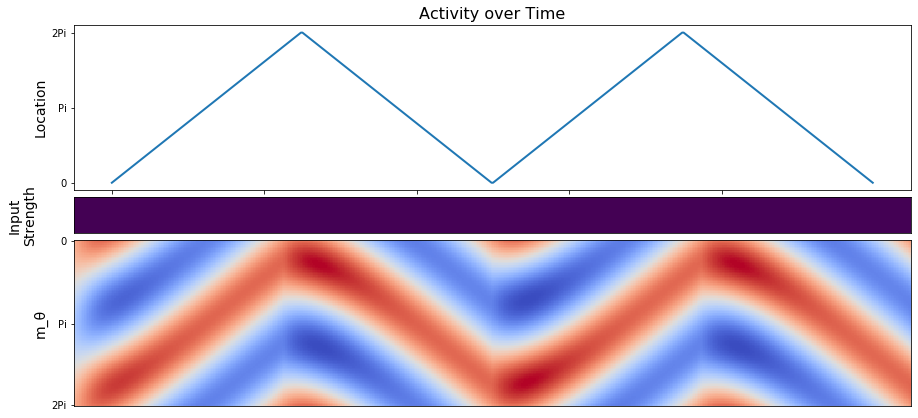

In [4]:
plot_output(input, alphas, f)

## A ring network with singular context-ring synapses

In [15]:
N = 100
N_c = 1
C = 0.5
indices_c = np.array([N//2])
network = SimpleMixedNetwork(N, N_c, C, indices_c)
num_steps = 1000
input = np.concatenate([
    np.linspace(0, 2*pi, num_steps//4),
    np.linspace(2*pi, 0, num_steps//4),
    np.linspace(0, 0, num_steps//4),
    np.linspace(0, 0, num_steps//4)
    ])
alphas = np.ones(input.size)*0.6
input_c = np.zeros((input.size, N_c))
input[500:,] = 0
alphas[500:,] = 0
input_c[650:800, -1] = 1
m, f, dmdt = network.simulate(input, input_c, alphas)

/home/chingf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


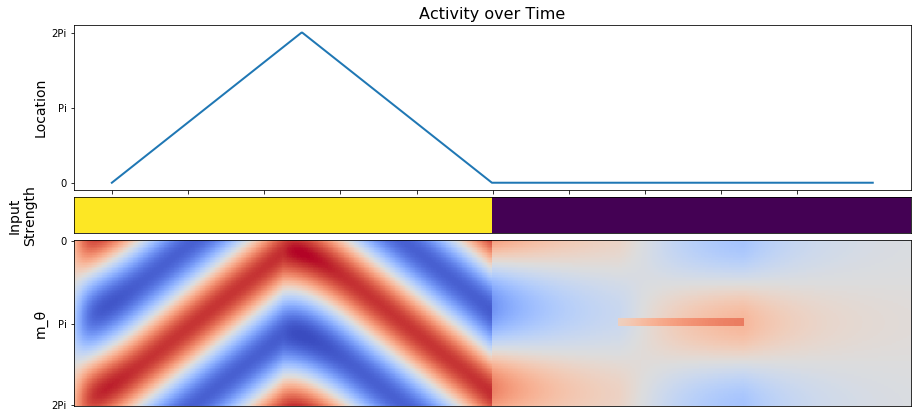

In [16]:
plot_output(input, alphas, f)

## A ring network with expanding context-ring synapses

In [17]:
N = 100
N_c = 2
C = 0.05
N_cr = 15
J_cr = 0.02
target_indices = np.array([N//2, 0])
np.random.seed(0)
network = MixedNetwork(N, N_c, C, N_cr, J_cr, target_indices)
# network.ring_indices= np.array([97])
# network._init_J()
num_steps = 1000
input = np.concatenate([
    np.linspace(0, 2*pi, num_steps//4),
    np.linspace(2*pi, 0, num_steps//4),
    np.linspace(0, 0, num_steps//4),
    np.linspace(0, 0, num_steps//4)
    ])
alphas = np.ones(input.size)*0.6
input_c = np.zeros((input.size, N_c))
alphas[500:,] = 0
input_c[650:800, 0] = 1
input_c[850:, 1] = 1
m, f, dmdt = network.simulate(input, input_c, alphas)

/home/chingf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


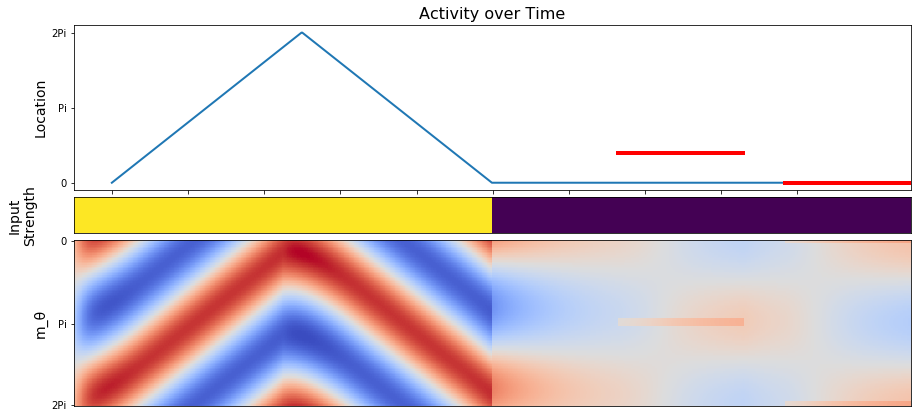

In [19]:
plot_output(input, alphas, f, input_c, target_indices)

## Spooky network

In [20]:
N = 100
N_c = 1
C = 0.5
N_cr = 20
J_cr = 0.1
target_indices = np.array([N//2])
np.random.seed(0)
network = PlasticMixedNetwork(N, N_c, C, N_cr, J_cr, target_indices)
num_steps = 1250
input = np.concatenate([
    np.linspace(0, 2*pi, num_steps//5),
    np.linspace(2*pi, 0, num_steps//5),
    np.linspace(0, 0, num_steps//5),
    np.linspace(0, 0, num_steps//5),
    np.linspace(0, 2*pi, num_steps//5)
    ])
alphas = np.ones(input.size)*0.6
input_c = np.zeros((input.size, N_c))
alphas[500:1000,] = 0
input_c[650:800, 0] = 1
m, f, dmdt = network.simulate(input, input_c, alphas)

/home/chingf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


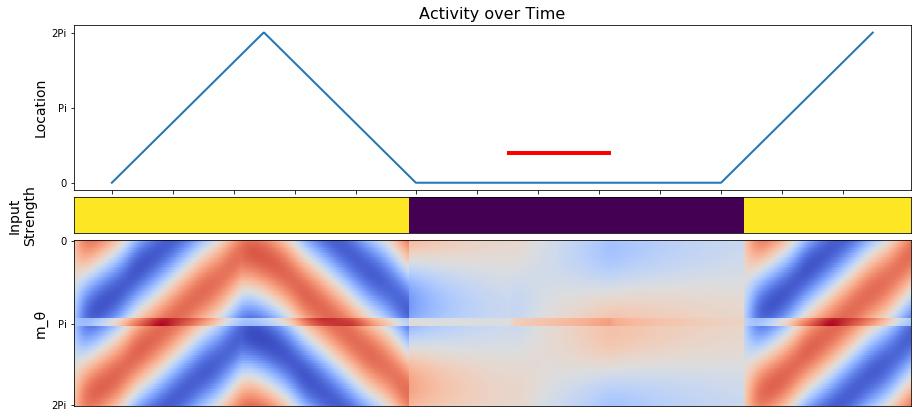

In [21]:
plot_output(input, alphas, f, input_c, target_indices)

In [30]:
#### N = 100
N = 100
N_c = 2
C = 1
N_cr = 40
J_cr = 0.06
target_indices = np.array([N//2, 0])
np.random.seed(0)
network = PlasticMixedNetwork(N, N_c, C, N_cr, J_cr, target_indices)
num_steps = 1250
input = np.concatenate([
    np.linspace(0, 2*pi, num_steps//5),
    np.linspace(2*pi, 0, num_steps//5),
    np.linspace(0, 0, num_steps//5),
    np.linspace(0, 0, num_steps//5),
    np.linspace(0, 2*pi, num_steps//5)
    ])
alphas = np.ones(input.size)*0.6
input_c = np.zeros((input.size, N_c))
alphas[500:1000,] = 0
input_c = np.zeros((input.size, N_c))
input_c[650:800, 0] = 1
input_c[850:, 1] = 1
m, f, dmdt = network.simulate(input, input_c, alphas)

/home/chingf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


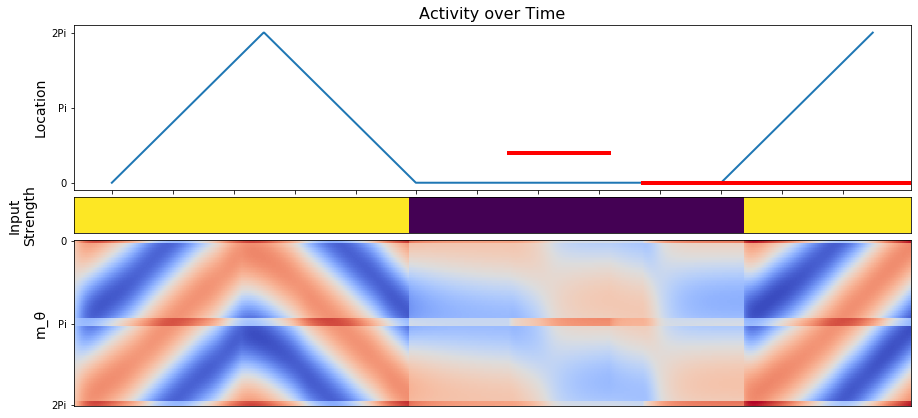

In [31]:
plot_output(input, alphas, f, input_c, target_indices)